In [1]:
class Agent:
    def __init__(self):
        self.actions = ["up","down","left","right"]
        self.pos = (0,0)
        
agent = Agent()

In [2]:
size = 10

class State:
    def __init__(self,actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "up"
        self.goal = False
        
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] =0.0
        self.goal = True
        
states = [[State(agent.actions) for i in range(size)] for j in range(size)]
states[9][9].set_goal(agent.actions)

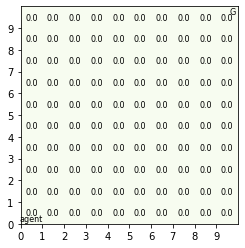

In [3]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos):
    fig, ax = plt.subplots()
    values = [[states[i][j].Q[states[i][j].best_action] for j in range(size)] for i in range(size)]
    mp = ax.pcolor(values, cmap=plt.cm.GnBu,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
 
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[x][y]
            plt.text(x+0.5,y+0.5,int(1000*s.Q[s.best_action])/1000,ha = 'center', va = 'center', size=8)
            if states[x][y].goal:
                plt.text(x+0.75,y+0.75,"G",ha = 'center', va = 'center', size=8)
                
    plt.text(agent.pos[0]+0.5,agent.pos[1]+0.25,"agent",ha = 'center', va = 'center', size=8)
    
    if mark_pos == "all":   # 指定した位置にactionの文字列を書くという処理
        for x in range(size):
            for y in range(size):
                if states[x][y].goal: continue
                plt.text(x+0.5,y+0.25,states[x][y].best_action,ha = 'center', va = 'center', size=8)
    elif mark_pos != None: 
        s = states[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,s.best_action,ha = 'center', va = 'center', size=8)
            
    plt.show()
    fig.clear()
    
draw(None)

In [4]:
import random

def state_transition(s_pos,a):
    ###確率10%で元のまま ###
    if random.uniform(0,1) < 0.1:
        return s_pos
    
    x,y = s_pos
    if   a == "up": y += 1
    elif a == "down": y -= 1
    elif a == "right": x += 1
    elif a == "left": x -= 1
        
    if x < 0:       x = 0
    elif x >= size: x = size-1
    if y < 0:       y = 0
    elif y >= size: y = size-1
        
    return (x,y)

In [5]:
def e_greedy(s):
    if random.uniform(0,1) < 0.1: #10%でランダムに
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        for a in s.Q:
            if best_q > s.Q[a]:
                best_q = s.Q[a]
                best_a = a
        s.best_action = best_a
        return best_a

s:(9, 5)　a:right s':(9, 5) a':up
----
s:(9, 5)　a:up s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


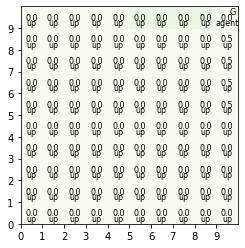

s:(3, 7)　a:up s':(3, 8) a':up
----
s:(3, 8)　a:up s':(3, 9) a':up
----
s:(3, 9)　a:up s':(3, 9) a':up
----
s:(3, 9)　a:up s':(3, 9) a':down
----
s:(3, 9)　a:down s':(3, 8) a':down
----
s:(3, 8)　a:down s':(3, 7) a':down
----
s:(3, 7)　a:down s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 7) a':left
----
s:(3, 7)　a:left s':(2, 7) a':down
----
s:(2, 7)　a:down s':(2, 6) a':up
----
s:(2, 6)　a:up s':(2, 7) a':right
----
s:(2, 7)　a:right s':(3, 7) a':right
----
s:(3, 7)　a:right s':(4, 7) a':up
----
s:(4, 7)　a:up s':(4, 7) a':up
----
s:(4, 7)　a:up s':(4, 8) a':right
----
s:(4, 8)　a:right s':(5, 8) a':up
----
s:(5, 8)　a:up s':(5, 8) a':up
----
s:(5, 8)　a:up s':(5, 9) a':up
----
s:(5, 9)　a:up s':(5, 9) a':up
----
s:(5, 9)　a:up s':(5, 9) a':down
----
s:(5, 9)　a:down s':(5, 9) a':down
----
s:(5, 9)　a:down s':(5, 8) a':down
----
s:(5, 8)　a:down s':(5, 7) a':left
----
s:(5, 7)　a:left s':(4, 7) a':down
----
s:(4, 7)　a:down s':(4, 7) a':down
----
s:(4, 7)　a:down s':(4, 6) a':u

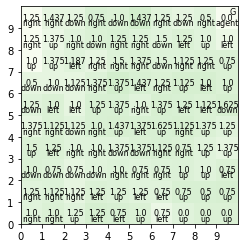

s:(5, 3)　a:left s':(4, 3) a':left
----
s:(4, 3)　a:left s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':left
----
s:(1, 2)　a:left s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':right
----
s:(1, 2)　a:right s':(2, 2) a':right
----
s:(2, 2)　a:right s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':right
----
s:(3, 3)　a:right s':(4, 3) a':right
----
s:(4, 3)　a:right s':(5, 3) a':right
----
s:(5, 3)　a:right s':(6, 3) a':down
----
s:(6, 3)　a:down s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':right
----
s:(6, 1)　a:right s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 1) a':left
----
s:(7, 1)　a:left s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(7, 0) a':down
----
s:(7, 0)　a:down s':

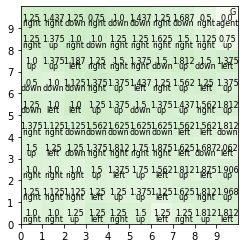

s:(6, 3)　a:down s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':right
----
s:(6, 1)　a:right s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 1) a':left
----
s:(7, 1)　a:left s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 3) a':up
----
s:(6, 3)　a:up s':(6, 4) a':left
----


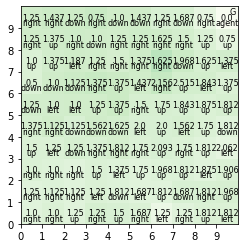

s:(5, 8)　a:left s':(4, 8) a':up
----
s:(4, 8)　a:up s':(4, 9) a':left
----
s:(4, 9)　a:left s':(3, 9) a':down
----
s:(3, 9)　a:down s':(3, 8) a':left
----
s:(3, 8)　a:left s':(2, 8) a':down
----
s:(2, 8)　a:down s':(2, 7) a':right
----
s:(2, 7)　a:right s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':right
----
s:(3, 8)　a:right s':(4, 8) a':left
----
s:(4, 8)　a:left s':(3, 8) a':up
----
s:(3, 8)　a:up s':(3, 9) a':left
----
s:(3, 9)　a:left s':(2, 9) a':right
----
s:(2, 9)　a:right s':(3, 9) a':up
----
s:(3, 9)　a:up s':(3, 9) a':up
----
s:(3, 9)　a:up s':(3, 9) a':right
----
s:(3, 9)　a:right s':(4, 9) a':right
----
s:(4, 9)　a:right s':(5, 9) a':down
----
s:(5, 9)　a:down s':(5, 8) a':up
----
s:(5, 8)　a:up s':(5, 8) a':up
----
s:(5, 8)　a:up s':(5, 8) a':down
----
s:(5, 8)　a:down s':(5, 7) a':up
----
s:(5, 7)　a:up s':(5, 8) a':right
----
s:(5, 8)　a:right s':(6, 8) a':left
----
s:(6, 8)　a:left s':(5, 8) a':left
----
s:(5, 8)　a:left s':(4, 8) a':up
----
s:(4, 8)　a:up s':(4, 9) a':up
----
s:(4, 9)　a:u

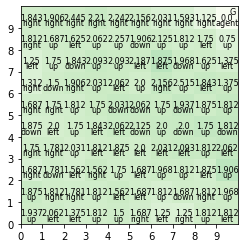

s:(9, 3)　a:down s':(9, 2) a':down
----
s:(9, 2)　a:down s':(9, 1) a':left
----
s:(9, 1)　a:left s':(8, 1) a':left
----
s:(8, 1)　a:left s':(7, 1) a':right
----
s:(7, 1)　a:right s':(8, 1) a':up
----
s:(8, 1)　a:up s':(8, 2) a':up
----
s:(8, 2)　a:up s':(8, 2) a':up
----
s:(8, 2)　a:up s':(8, 2) a':right
----
s:(8, 2)　a:right s':(9, 2) a':left
----
s:(9, 2)　a:left s':(8, 2) a':down
----
s:(8, 2)　a:down s':(8, 1) a':down
----
s:(8, 1)　a:down s':(8, 0) a':left
----
s:(8, 0)　a:left s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 1) a':up
----
s:(7, 1)　a:up s':(7, 2) a':down
----
s:(7, 2)　a:down s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':right
----
s:(7, 0)　a:right s':(8, 0) a':down
----
s:(8, 0)　a:down s':(8, 0) a':down
----
s:(8, 0)　a:down s':(8, 0) a':right
----
s:(8, 0)　a:right s':(9, 0) a':up
----
s:(9, 0)　a:up s':(9, 1) a':left
----
s:(9, 1)　a:left s':(8, 1) a':right
----
s:(8, 1)　a:right s':(9, 1) a':right
----
s:(9, 1)　a:right s':(9, 1) a':right
----
s:(9, 1)　a:right s':(9, 1) a':up
---

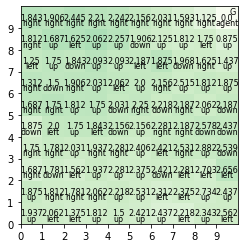

s:(7, 5)　a:left s':(6, 5) a':left
----
s:(6, 5)　a:left s':(5, 5) a':up
----
s:(5, 5)　a:up s':(5, 6) a':left
----
s:(5, 6)　a:left s':(4, 6) a':up
----
s:(4, 6)　a:up s':(4, 7) a':down
----
s:(4, 7)　a:down s':(4, 6) a':right
----
s:(4, 6)　a:right s':(5, 6) a':left
----
s:(5, 6)　a:left s':(4, 6) a':down
----
s:(4, 6)　a:down s':(4, 5) a':up
----
s:(4, 5)　a:up s':(4, 6) a':left
----
s:(4, 6)　a:left s':(3, 6) a':left
----
s:(3, 6)　a:left s':(2, 6) a':up
----
s:(2, 6)　a:up s':(2, 7) a':up
----
s:(2, 7)　a:up s':(2, 8) a':up
----
s:(2, 8)　a:up s':(2, 9) a':right
----
s:(2, 9)　a:right s':(3, 9) a':left
----
s:(3, 9)　a:left s':(3, 9) a':up
----
s:(3, 9)　a:up s':(3, 9) a':down
----
s:(3, 9)　a:down s':(3, 8) a':left
----
s:(3, 8)　a:left s':(2, 8) a':left
----
s:(2, 8)　a:left s':(1, 8) a':right
----
s:(1, 8)　a:right s':(2, 8) a':left
----
s:(2, 8)　a:left s':(1, 8) a':left
----
s:(1, 8)　a:left s':(0, 8) a':up
----
s:(0, 8)　a:up s':(0, 9) a':up
----
s:(0, 9)　a:up s':(0, 9) a':up
----
s:(0, 9)　a:up s':(

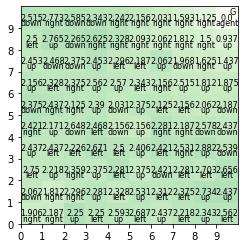

s:(1, 8)　a:down s':(1, 7) a':up
----
s:(1, 7)　a:up s':(1, 8) a':right
----
s:(1, 8)　a:right s':(2, 8) a':right
----
s:(2, 8)　a:right s':(2, 8) a':right
----
s:(2, 8)　a:right s':(3, 8) a':up
----
s:(3, 8)　a:up s':(3, 9) a':right
----
s:(3, 9)　a:right s':(4, 9) a':left
----
s:(4, 9)　a:left s':(3, 9) a':down
----
s:(3, 9)　a:down s':(3, 9) a':down
----
s:(3, 9)　a:down s':(3, 8) a':down
----
s:(3, 8)　a:down s':(3, 7) a':right
----
s:(3, 7)　a:right s':(4, 7) a':right
----
s:(4, 7)　a:right s':(5, 7) a':up
----
s:(5, 7)　a:up s':(5, 8) a':up
----
s:(5, 8)　a:up s':(5, 9) a':down
----
s:(5, 9)　a:down s':(5, 8) a':left
----
s:(5, 8)　a:left s':(4, 8) a':down
----
s:(4, 8)　a:down s':(4, 7) a':left
----
s:(4, 7)　a:left s':(3, 7) a':left
----
s:(3, 7)　a:left s':(3, 7) a':left
----
s:(3, 7)　a:left s':(2, 7) a':up
----
s:(2, 7)　a:up s':(2, 8) a':down
----
s:(2, 8)　a:down s':(2, 8) a':down
----
s:(2, 8)　a:down s':(2, 7) a':right
----
s:(2, 7)　a:right s':(3, 7) a':down
----
s:(3, 7)　a:down s':(3, 6) a':le

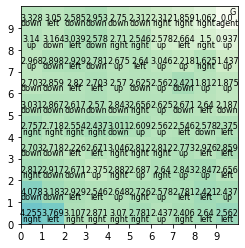

s:(1, 4)　a:left s':(1, 4) a':left
----
s:(1, 4)　a:left s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':right
----
s:(0, 6)　a:right s':(1, 6) a':right
----
s:(1, 6)　a:right s':(2, 6) a':right
----
s:(2, 6)　a:right s':(3, 6) a':down
----
s:(3, 6)　a:down s':(3, 5) a':left
----
s:(3, 5)　a:left s':(3, 5) a':left
----
s:(3, 5)　a:left s':(2, 5) a':right
----
s:(2, 5)　a:right s':(3, 5) a':right
----
s:(3, 5)　a:right s':(3, 5) a':right
----
s:(3, 5)　a:right s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 6) a':right
----
s:(3, 6)　a:right s':(4, 6) a':right
----
s:(4, 6)　a:right s':(5, 6) a':right
----
s:(5, 6)　a:right s':(6, 6) a':down
----
s:(6, 6)　a:down s':(6, 5) a':left
----
s:(6, 5)　a:left s':(5, 

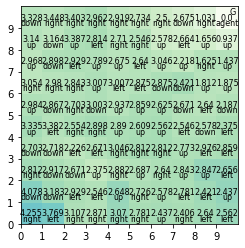

s:(9, 0)　a:right s':(9, 0) a':right
----
s:(9, 0)　a:right s':(9, 0) a':up
----
s:(9, 0)　a:up s':(9, 1) a':left
----
s:(9, 1)　a:left s':(8, 1) a':down
----
s:(8, 1)　a:down s':(8, 0) a':right
----
s:(8, 0)　a:right s':(9, 0) a':down
----
s:(9, 0)　a:down s':(9, 0) a':down
----
s:(9, 0)　a:down s':(9, 0) a':left
----
s:(9, 0)　a:left s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 1) a':right
----
s:(8, 1)　a:right s':(9, 1) a':down
----
s:(9, 1)　a:down s':(9, 0) a':up
----
s:(9, 0)　a:up s':(9, 1) a':down
----
s:(9, 1)　a:down s':(9, 1) a':up
----
s:(9, 1)　a:up s':(9, 2) a':up
----
s:(9, 2)　a:up s':(9, 3) a':up
----
s:(9, 3)　a:up s':(9, 4) a':up
----
s:(9, 4)　a:up s':(9, 5) a':right
----
s:(9, 5)　a:right s':(9, 5) a':up
----
s:(9, 5)　a:up s':(9, 6) a':right
----
s:(9, 6)　a:right s':(9, 6) a':right
----
s:(9, 6)　a:right s':(9, 6) a':down
----
s:(9, 6)　a:down s':(9, 5) a':left
----
s:(9, 5)　a:left s':(8, 5) a':up
----
s:(8, 5)　a:up s':(8, 5) a':up
----
s:(8, 5)　a:up s':(8, 6) a':up
----
s:(8, 6)　a:up s

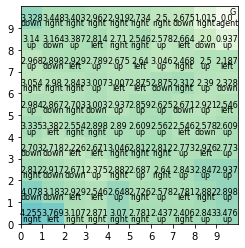

s:(9, 1)　a:left s':(8, 1) a':left
----
s:(8, 1)　a:left s':(7, 1) a':right
----
s:(7, 1)　a:right s':(8, 1) a':down
----
s:(8, 1)　a:down s':(8, 0) a':down
----
s:(8, 0)　a:down s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 1) a':up
----
s:(8, 1)　a:up s':(8, 2) a':right
----
s:(8, 2)　a:right s':(9, 2) a':left
----
s:(9, 2)　a:left s':(9, 2) a':left
----
s:(9, 2)　a:left s':(8, 2) a':down
----
s:(8, 2)　a:down s':(8, 1) a':right
----
s:(8, 1)　a:right s':(9, 1) a':right
----
s:(9, 1)　a:right s':(9, 1) a':right
----
s:(9, 1)　a:right s':(9, 1) a':up
----
s:(9, 1)　a:up s':(9, 2) a':down
----
s:(9, 2)　a:down s':(9, 2) a':right
----
s:(9, 2)　a:right s':(9, 2) a':right
----
s:(9, 2)　a:right s':(9, 2) a':up
----
s:(9, 2)　a:up s':(9, 3) a':down
----
s:(9, 3)　a:down s':(9, 2) a':down
----
s:(9, 2)　a:down s':(9, 1) a':left
----
s:(9, 1)　a:left s':(9, 1) a':left
----
s:(9, 1)　a:left s':(9, 1) a':down
----
s:(9, 1)　a:down s':(9, 0) a':left
----
s:(9, 0)　a:left s':(9, 0) a':left
----
s:(9, 0)　a:left s':(9, 0) a

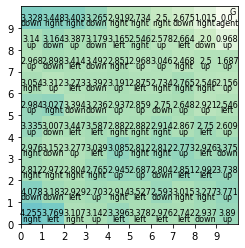

s:(8, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


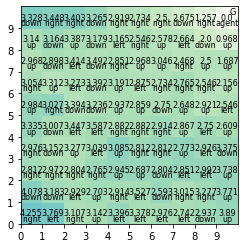

s:(5, 8)　a:up s':(5, 9) a':down
----
s:(5, 9)　a:down s':(5, 8) a':down
----
s:(5, 8)　a:down s':(5, 7) a':right
----
s:(5, 7)　a:right s':(5, 7) a':right
----
s:(5, 7)　a:right s':(6, 7) a':down
----
s:(6, 7)　a:down s':(6, 6) a':right
----
s:(6, 6)　a:right s':(7, 6) a':down
----
s:(7, 6)　a:down s':(7, 6) a':down
----
s:(7, 6)　a:down s':(7, 5) a':left
----
s:(7, 5)　a:left s':(6, 5) a':up
----
s:(6, 5)　a:up s':(6, 6) a':left
----
s:(6, 6)　a:left s':(5, 6) a':right
----
s:(5, 6)　a:right s':(6, 6) a':up
----
s:(6, 6)　a:up s':(6, 6) a':up
----
s:(6, 6)　a:up s':(6, 7) a':left
----
s:(6, 7)　a:left s':(5, 7) a':down
----
s:(5, 7)　a:down s':(5, 7) a':down
----
s:(5, 7)　a:down s':(5, 6) a':up
----
s:(5, 6)　a:up s':(5, 7) a':left
----
s:(5, 7)　a:left s':(4, 7) a':up
----
s:(4, 7)　a:up s':(4, 8) a':down
----
s:(4, 8)　a:down s':(4, 7) a':left
----
s:(4, 7)　a:left s':(4, 7) a':left
----
s:(4, 7)　a:left s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':right
----
s:(3, 8)　a:right s':(4, 8) a':right
----
s

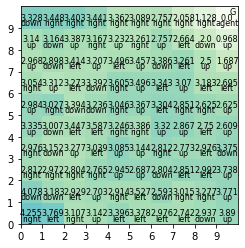

s:(4, 4)　a:up s':(4, 5) a':down
----
s:(4, 5)　a:down s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':up
----
s:(4, 5)　a:up s':(4, 5) a':up
----
s:(4, 5)　a:up s':(4, 6) a':down
----
s:(4, 6)　a:down s':(4, 5) a':left
----
s:(4, 5)　a:left s':(3, 5) a':left
----
s:(3, 5)　a:left s':(2, 5) a':up
----
s:(2, 5)　a:up s':(2, 6) a':right
----
s:(2, 6)　a:right s':(3, 6) a':right
----
s:(3, 6)　a:right s':(4, 6) a':left
----
s:(4, 6)　a:left s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 7) a':left
----
s:(3, 7)　a:left s':(2, 7) a':right
----
s:(2, 7)　a:right s':(2, 7) a':right
----
s:(2, 7)　a:right s':(3, 7) a':right
----
s:(3, 7)　a:right s':(4, 7) a':right
----
s:(4, 7)　a:right s':(5, 7) a':right
----
s:(5, 7)　a:right s':(6, 7) a':left
----
s:(6, 7)　a:left s':(6, 7) a':left

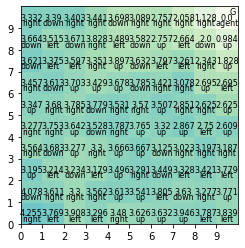

s:(1, 9)　a:left s':(0, 9) a':left
----
s:(0, 9)　a:left s':(0, 9) a':down
----
s:(0, 9)　a:down s':(0, 8) a':right
----
s:(0, 8)　a:right s':(1, 8) a':right
----
s:(1, 8)　a:right s':(2, 8) a':left
----
s:(2, 8)　a:left s':(1, 8) a':right
----
s:(1, 8)　a:right s':(2, 8) a':up
----
s:(2, 8)　a:up s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':down
----
s:(2, 9)　a:down s':(2, 9) a':down
----
s:(2, 9)　a:down s':(2, 8) a':right
----
s:(2, 8)　a:right s':(3, 8) a':down
----
s:(3, 8)　a:down s':(3, 8) a':up
----
s:(3, 8)　a:up s':(3, 9) a':left
----
s:(3, 9)　a:left s':(2, 9) a':right
----
s:(2, 9)　a:right s':(3, 9) a':down
----
s:(3, 9)　a:down s':(3, 8) a':left
----
s:(3, 8)　a:left s':(2, 8) a':down
----
s:(2, 8)　a:down s':(2, 7) a':up
----
s:(2, 7)　a:up s':(2, 8) a':left
----
s:(2, 8)　a:left s':(1, 8) a':up
----
s:(1, 8)　a:up s':(1, 9) a':down
----
s:(1, 9)　a:down s':(1, 8) a':down
----
s:(1, 8)　a:down s':(1, 7) a':down
----
s:(1, 7)　a:down s':(1, 6) a':left
----


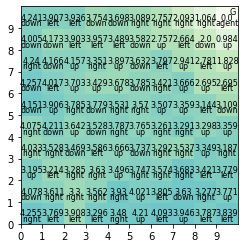

s:(5, 3)　a:right s':(6, 3) a':left
----
s:(6, 3)　a:left s':(5, 3) a':left
----
s:(5, 3)　a:left s':(5, 3) a':down
----
s:(5, 3)　a:down s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':left
----
s:(3, 1)　a:left s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':up
----
s:(1, 2)　a:up s':(1, 3) a':right
----
s:(1, 3)　a:right s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':left
----
s:(2, 4)　a:left s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':right
----
s:(3, 3)　a:right s':(4, 3) a':down
----
s:(4, 3)　a:down s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':right

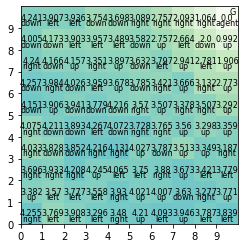

s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':left
----
s:(1, 2)　a:left s':(1, 2) a':left
----
s:(1, 2)　a:left s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a

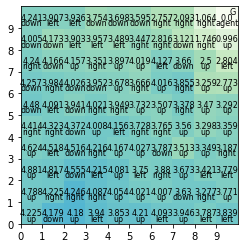

s:(5, 5)　a:left s':(4, 5) a':left
----
s:(4, 5)　a:left s':(3, 5) a':left
----
s:(3, 5)　a:left s':(2, 5) a':left
----
s:(2, 5)　a:left s':(2, 5) a':left
----
s:(2, 5)　a:left s':(2, 5) a':right
----
s:(2, 5)　a:right s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':down
----
s:(5, 4)　a:down s':(5, 3) a':right
----
s:(5, 3)　a:right s':(6, 3) a':right
----
s:(6, 3)　a:right s':(7, 3) a':left
----
s:(7, 3)　a:left s':(6, 3) a':up
----
s:(6, 3)　a:up s':(6, 4) a':up
----
s:(6, 4)　a:up s':(6, 5) a':right
----
s:(6, 5)　a:right s':(7, 5) a':left
----
s:(7, 5)　a:left s':(6, 5) a':left
----
s:(6, 5)　a:left s':(5, 5) a':down
----
s:(5, 5)　a:down s':(5, 4) a':right
----
s:(5, 4)　a:right s':(6, 4) a':down
----
s:(6, 4)　a:down s':(6, 3) a':left
----
s:(6, 3)　a:left s':(5, 3) a':left
----
s:(5, 3)　a:left s':(4, 3) a':down
----
s:(4, 3)　a:down s':(4, 3) a':down
----
s:(4, 3)　a:down s':(4, 2) a':down
----
s:(4, 2)　a:down s':

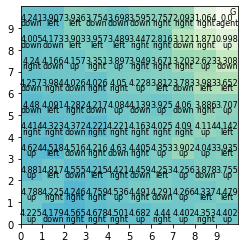

s:(2, 8)　a:up s':(2, 9) a':right
----
s:(2, 9)　a:right s':(3, 9) a':right
----
s:(3, 9)　a:right s':(4, 9) a':up
----
s:(4, 9)　a:up s':(4, 9) a':up
----
s:(4, 9)　a:up s':(4, 9) a':left
----
s:(4, 9)　a:left s':(3, 9) a':up
----
s:(3, 9)　a:up s':(3, 9) a':up
----
s:(3, 9)　a:up s':(3, 9) a':down
----
s:(3, 9)　a:down s':(3, 8) a':down
----
s:(3, 8)　a:down s':(3, 8) a':down
----
s:(3, 8)　a:down s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':up
----
s:(3, 8)　a:up s':(3, 9) a':left
----
s:(3, 9)　a:left s':(2, 9) a':left
----
s:(2, 9)　a:left s':(1, 9) a':up
----
s:(1, 9)　a:up s':(1, 9) a':up
----
s:(1, 9)　a:up s':(1, 9) a':down
----
s:(1, 9)　a:down s':(1, 8) a':up
----
s:(1, 8)　a:up s':(1, 9) a':left
----
s:(1, 9)　a:left s':(0, 9) a':right
----
s:(0, 9)　a:right s':(1, 9) a':right
----
s:(1, 9)　a:right s':(1, 9) a':right
----
s:(1, 9)　a:right s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':down
----
s:(2, 9)　a:down s':(2, 8) a':left
----
s:(2, 8)　a:left s':(2,

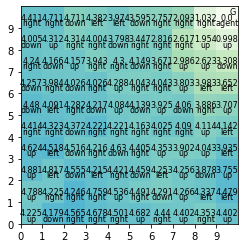

s:(5, 1)　a:right s':(6, 1) a':right
----
s:(6, 1)　a:right s':(7, 1) a':right
----
s:(7, 1)　a:right s':(8, 1) a':up
----
s:(8, 1)　a:up s':(8, 2) a':left
----
s:(8, 2)　a:left s':(7, 2) a':up
----
s:(7, 2)　a:up s':(7, 3) a':right
----
s:(7, 3)　a:right s':(8, 3) a':left
----
s:(8, 3)　a:left s':(7, 3) a':down
----
s:(7, 3)　a:down s':(7, 2) a':right
----
s:(7, 2)　a:right s':(8, 2) a':up
----
s:(8, 2)　a:up s':(8, 3) a':right
----
s:(8, 3)　a:right s':(9, 3) a':up
----
s:(9, 3)　a:up s':(9, 3) a':up
----
s:(9, 3)　a:up s':(9, 4) a':up
----
s:(9, 4)　a:up s':(9, 5) a':up
----
s:(9, 5)　a:up s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':right
----
s:(9, 7)　a:right s':(9, 7) a':right
----
s:(9, 7)　a:right s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 8) a':down
----
s:(9, 8)　a:down s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':left
----
s:(9, 8)　a:left s':(8, 8) a':right
----
s:(8, 8)　a:right s':(9, 8) a':right
----
s:(9, 8)　a:right

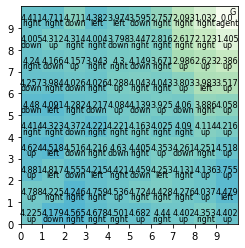

s:(7, 5)　a:left s':(6, 5) a':right
----
s:(6, 5)　a:right s':(6, 5) a':right
----
s:(6, 5)　a:right s':(7, 5) a':right
----
s:(7, 5)　a:right s':(8, 5) a':down
----
s:(8, 5)　a:down s':(8, 4) a':down
----
s:(8, 4)　a:down s':(8, 3) a':down
----
s:(8, 3)　a:down s':(8, 2) a':right
----
s:(8, 2)　a:right s':(9, 2) a':up
----
s:(9, 2)　a:up s':(9, 3) a':down
----
s:(9, 3)　a:down s':(9, 2) a':left
----
s:(9, 2)　a:left s':(8, 2) a':down
----
s:(8, 2)　a:down s':(8, 1) a':down
----
s:(8, 1)　a:down s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 1) a':right
----
s:(8, 1)　a:right s':(9, 1) a':down
----
s:(9, 1)　a:down s':(9, 1) a':down
----
s:(9, 1)　a:down s':(9, 0) a':right
----
s:(9, 0)　a:right s':(9, 0) a':right
----
s:(9, 0)　a:right s':(9, 0) a':down
----
s:(9, 0)　a:down s':(9, 0) a':down
----
s:(9, 0)　a:down s':(9, 0) a':left
----
s:(9, 0)　a:left s':(8, 0) a':left
----
s:(8, 0)　a:left s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 1) a':left
----
s:(7, 1)　a:left s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a

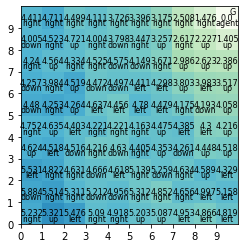

s:(4, 7)　a:left s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':left
----
s:(3, 8)　a:left s':(3, 8) a':left
----
s:(3, 8)　a:left s':(2, 8) a':right
----
s:(2, 8)　a:right s':(3, 8) a':right
----
s:(3, 8)　a:right s':(4, 8) a':left
----
s:(4, 8)　a:left s':(4, 8) a':left
----
s:(4, 8)　a:left s':(3, 8) a':down
----
s:(3, 8)　a:down s':(3, 7) a':down
----
s:(3, 7)　a:down s':(3, 6) a':right
----
s:(3, 6)　a:right s':(4, 6) a':right
----
s:(4, 6)　a:right s':(5, 6) a':right
----
s:(5, 6)　a:right s':(6, 6) a':down
----
s:(6, 6)　a:down s':(6, 5) a':down
----
s:(6, 5)　a:down s':(6, 4) a':right
----
s:(6, 4)　a:right s':(7, 4) a':down
----
s:(7, 4)　a:down s':(7, 3) a':up
----
s:(7, 3)　a:up s':(7, 4) a':up
----
s:(7, 4)　a:up s':(7, 5) a':down
----
s:(7, 5)　a:down s':(7, 4) a':down
----
s:(7, 4)　a:down s':(7, 3) a':right
----
s:(7, 3)　a:right s':(8, 3) a':left
----
s:(8, 3)　a:left s':(8, 3) a':left
----
s:(8, 3)　a:left s':(7, 3) a':down
----
s:(7, 3)　a:down s':(7, 2) a':up
----
s:(7, 2)　a:up s':(7, 3) a

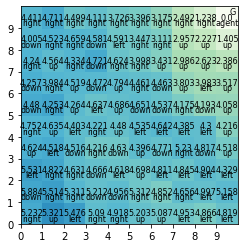

s:(2, 7)　a:down s':(2, 6) a':left
----
s:(2, 6)　a:left s':(1, 6) a':down
----
s:(1, 6)　a:down s':(1, 6) a':down
----
s:(1, 6)　a:down s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 6) a':right
----
s:(1, 6)　a:right s':(2, 6) a':right
----
s:(2, 6)　a:right s':(3, 6) a':left
----
s:(3, 6)　a:left s':(2, 6) a':down
----
s:(2, 6)　a:down s':(2, 5) a':right
----
s:(2, 5)　a:right s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':down
----
s:(4, 5)　a:down s':(4, 4) a':down
----
s:(4, 4)　a:down s':(4, 3) a':left
----
s:(4, 3)　a:left s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':up
----
s:(2, 4)　a:up s':(2, 5) a':down
----
s:(2, 5)　a:down s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':right
----
s:(3, 3)　a:right s':(4, 3) a':right
----
s:(4, 3)　a:right s':(5, 3) a':down
----
s:(5, 3)　a:down s':(5, 3) a':down
----
s:(5, 3)　a:down s':(5, 2) a

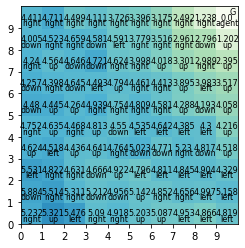

s:(4, 3)　a:up s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':left
----
s:(3, 4)　a:left s':(3, 4) a':left
----
s:(3, 4)　a:left s':(2, 4) a':down
----
s:(2, 4)　a:down s':(2, 3) a':left
----
s:(2, 3)　a:left s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':left
----
s:(2, 4)　a:left s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':right
----
s:(2, 4)　a:right s':(2, 4) a':down
----
s:(2, 4)　a:down s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 3) a':left
----
s:(2, 3)　a:left s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':up
----
s:(1, 2)　a:up s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':left
-

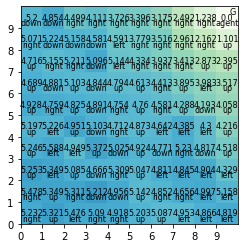

s:(3, 2)　a:left s':(2, 2) a':right
----
s:(2, 2)　a:right s':(3, 2) a':right
----
s:(3, 2)　a:right s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':right
----
s:(3, 3)　a:right s':(4, 3) a':up
----
s:(4, 3)　a:up s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':down
----
s:(5, 5)　a:down s':(5, 4) a':left
----
s:(5, 4)　a:left s':(5, 4) a':left
----
s:(5, 4)　a:left s':(4, 4) a':down
----
s:(4, 4)　a:down s':(4, 3) a':right
----
s:(4, 3)　a:right s':(5, 3) a':right
----
s:(5, 3)　a:right s':(6, 3) a':left
----
s:(6, 3)　a:left s':(5, 3) a':right
----
s:(5, 3)　a:right s':(6, 3) a':up
----
s:(6, 3)　a:up s':(6, 4) a':down
----
s:(6, 4)　a:down s':(6, 3) a':up
----
s:(6, 3)　a:up s':(6, 4) a':up
----
s:(6, 4)　a:up s':(6, 5) a':down
----
s:(6, 5)　a:down s':(6, 4) a':left
----
s:(6, 4)　a:left s':(5, 4) a':right
----
s:(5, 4)　a:right s':(6, 4) a':right
----
s:(6, 4)　a:right s':(7, 4) a':

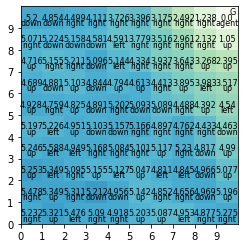

s:(5, 4)　a:down s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----
s:(5, 5)　a:up s':(5, 6) a':left
----
s:(5, 6)　a:left s':(4, 6) a':left
----
s:(4, 6)　a:left s':(3, 6) a':left
----
s:(3, 6)　a:left s':(3, 6) a':left
----
s:(3, 6)　a:left s':(2, 6) a':down
----
s:(2, 6)　a:down s':(2, 5) a':left
----
s:(2, 5)　a:left s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 6) a':up
----
s:(1, 6)　a:up s':(1, 7) a':down
----
s:(1, 7)　a:down s':(1, 6) a':left
----
s:(1, 6)　a:left s':(0, 6) a':up
----
s:(0, 6)　a:up s':(0, 7) a':left
----
s:(0, 7)　a:left s':(0, 7) a':left
----
s:(0, 7)　a:left s':(0, 7) a':down
----
s:(0, 7)　a:down s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':down
----
s:(0, 6)　a:down s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':right
----
s:(1, 5)　a:right s':(2, 5) a':right
----
s:(2, 5)　a:right s':(2, 5) a':up
----
s:(2, 5)　a:up s':(2, 6) a':right
----
s:(2, 6)　a:right s':(3, 6) a':right
----
s:(3, 6)　a:right s':(4, 6) a':down
----
s:(4

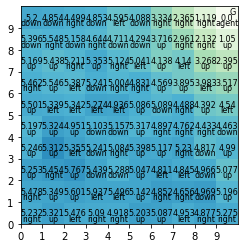

s:(9, 5)　a:down s':(9, 4) a':left
----
s:(9, 4)　a:left s':(8, 4) a':up
----
s:(8, 4)　a:up s':(8, 4) a':up
----
s:(8, 4)　a:up s':(8, 5) a':right
----
s:(8, 5)　a:right s':(9, 5) a':right
----
s:(9, 5)　a:right s':(9, 5) a':right
----
s:(9, 5)　a:right s':(9, 5) a':up
----
s:(9, 5)　a:up s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


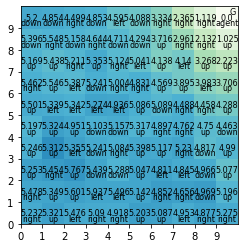

s:(2, 9)　a:left s':(1, 9) a':up
----
s:(1, 9)　a:up s':(1, 9) a':up
----
s:(1, 9)　a:up s':(1, 9) a':right
----
s:(1, 9)　a:right s':(2, 9) a':right
----
s:(2, 9)　a:right s':(3, 9) a':left
----
s:(3, 9)　a:left s':(2, 9) a':down
----
s:(2, 9)　a:down s':(2, 8) a':up
----
s:(2, 8)　a:up s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':left
----
s:(2, 9)　a:left s':(1, 9) a':down
----
s:(1, 9)　a:down s':(1, 8) a':up
----
s:(1, 8)　a:up s':(1, 8) a':up
----
s:(1, 8)　a:up s':(1, 9) a':left
----
s:(1, 9)　a:left s':(0, 9) a':right
----
s:(0, 9)　a:right s':(1, 9) a':right
----
s:(1, 9)　a:right s':(2, 9) a':right
----
s:(2, 9)　a:right s':(3, 9) a':right
----
s:(3, 9)　a:right s':(4, 9) a':right
----
s:(4, 9)　a:right s':(5, 9) a':right
----
s:(5, 9)　a:right s':(6, 9) a':up
----
s:(6, 9)　a:up s':(6, 9) a':up
----
s:(6, 9)　a:up s':(6, 9) a':down
----
s:(6, 9)　a:down s':(6, 8) a':right
----
s:(6, 8)　a:right s':(7, 8) a':up
----
s:(7, 8)　a:up s':(7, 9) a':right
----
s:(7, 9

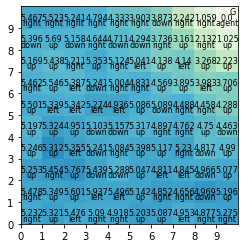

s:(7, 4)　a:down s':(7, 3) a':up
----
s:(7, 3)　a:up s':(7, 4) a':left
----
s:(7, 4)　a:left s':(6, 4) a':right
----
s:(6, 4)　a:right s':(7, 4) a':up
----
s:(7, 4)　a:up s':(7, 5) a':up
----
s:(7, 5)　a:up s':(7, 6) a':left
----
s:(7, 6)　a:left s':(6, 6) a':left
----
s:(6, 6)　a:left s':(5, 6) a':down
----
s:(5, 6)　a:down s':(5, 5) a':left
----
s:(5, 5)　a:left s':(4, 5) a':down
----
s:(4, 5)　a:down s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':right
----
s:(5, 4)　a:right s':(6, 4) a':down
----
s:(6, 4)　a:down s':(6, 3) a':down
----
s:(6, 3)　a:down s':(6, 2) a':right
----
s:(6, 2)　a:right s':(7, 2) a':down
----
s:(7, 2)　a:down s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':right
----
s:(7, 0)　a:right s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 1) a':right
----
s:(8, 1)　a:right s':(9, 1) a':right
----
s:(9, 1)　a:right s':(9, 1) a':right
----
s:(9, 1)　a:right s':(9, 1) a':up
----
s:(9, 1)　a:up s':(9, 2) a':down
----
s:(9, 2)　a:down s':(9, 1) a':

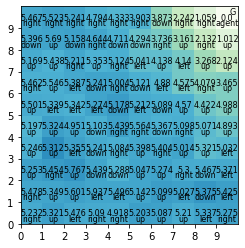

s:(3, 0)　a:right s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(7, 0) a':down
----
s:(7, 0)　a:down s':(7, 0) a':down
----
s:(7, 0)　a:down s':(7, 0) a':left
----
s:(7, 0)　a:left s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(7, 0) a':right
----
s:(7, 0)　a:right s':(8, 0) a':right
----
s:(8, 0)　a:right s':(9, 0) a':left
----
s:(9, 0)　a:left s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 1) a':left
----
s:(8, 1)　a:left s':(8, 1) a':left
----
s:(8, 1)　a:left s':(7, 1) a':right
----
s:(7, 1)　a:right s':(8, 1) a':left
----
s:(8, 1)　a:left s':(7, 1) a':up
----
s:(7, 1)　a:up s':(7, 2) a':left
----
s:(7, 2)　a:left s':(6,

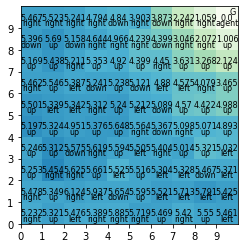

s:(7, 7)　a:up s':(7, 8) a':down
----
s:(7, 8)　a:down s':(7, 7) a':right
----
s:(7, 7)　a:right s':(8, 7) a':right
----
s:(8, 7)　a:right s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


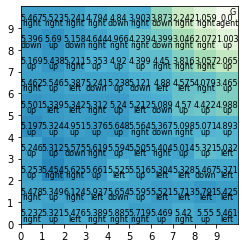

s:(9, 1)　a:down s':(9, 0) a':down
----
s:(9, 0)　a:down s':(9, 0) a':down
----
s:(9, 0)　a:down s':(9, 0) a':right
----
s:(9, 0)　a:right s':(9, 0) a':right
----
s:(9, 0)　a:right s':(9, 0) a':left
----
s:(9, 0)　a:left s':(8, 0) a':left
----
s:(8, 0)　a:left s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':left
----
s:(7, 0)　a:left s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':right
----
s:(3, 0)　a:right s':

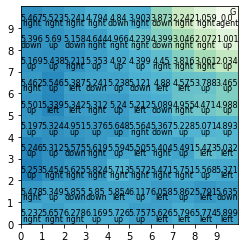

s:(3, 5)　a:up s':(3, 6) a':down
----
s:(3, 6)　a:down s':(3, 5) a':left
----
s:(3, 5)　a:left s':(2, 5) a':right
----
s:(2, 5)　a:right s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':down
----
s:(4, 5)　a:down s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':right
----
s:(5, 5)　a:right s':(6, 5) a':right
----
s:(6, 5)　a:right s':(7, 5) a':up
----
s:(7, 5)　a:up s':(7, 6) a':right
----
s:(7, 6)　a:right s':(8, 6) a':up
----
s:(8, 6)　a:up s':(8, 7) a':right
----
s:(8, 7)　a:right s':(8, 7) a':right
----
s:(8, 7)　a:right s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


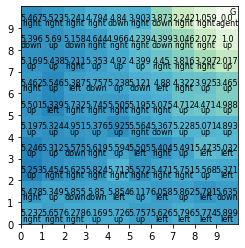

s:(5, 6)　a:up s':(5, 7) a':down
----
s:(5, 7)　a:down s':(5, 6) a':right
----
s:(5, 6)　a:right s':(6, 6) a':right
----
s:(6, 6)　a:right s':(7, 6) a':up
----
s:(7, 6)　a:up s':(7, 7) a':down
----
s:(7, 7)　a:down s':(7, 6) a':up
----
s:(7, 6)　a:up s':(7, 6) a':down
----
s:(7, 6)　a:down s':(7, 5) a':up
----
s:(7, 5)　a:up s':(7, 6) a':right
----
s:(7, 6)　a:right s':(8, 6) a':up
----
s:(8, 6)　a:up s':(8, 7) a':down
----
s:(8, 7)　a:down s':(8, 6) a':left
----
s:(8, 6)　a:left s':(8, 6) a':left
----
s:(8, 6)　a:left s':(7, 6) a':left
----
s:(7, 6)　a:left s':(6, 6) a':down
----
s:(6, 6)　a:down s':(6, 6) a':right
----
s:(6, 6)　a:right s':(7, 6) a':right
----
s:(7, 6)　a:right s':(8, 6) a':up
----
s:(8, 6)　a:up s':(8, 7) a':up
----
s:(8, 7)　a:up s':(8, 8) a':right
----
s:(8, 8)　a:right s':(9, 8) a':down
----
s:(9, 8)　a:down s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


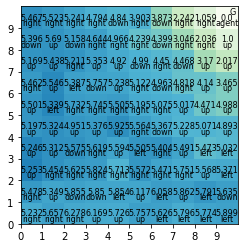

s:(7, 1)　a:right s':(7, 1) a':right
----
s:(7, 1)　a:right s':(8, 1) a':up
----
s:(8, 1)　a:up s':(8, 2) a':left
----
s:(8, 2)　a:left s':(7, 2) a':left
----
s:(7, 2)　a:left s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':right
----
s:(6, 2)　a:right s':(7, 2) a':up
----
s:(7, 2)　a:up s':(7, 3) a':down
----
s:(7, 3)　a:down s':(7, 2) a':down
----
s:(7, 2)　a:down s':(7, 2) a':down
----
s:(7, 2)　a:down s':(7, 1) a':left
----
s:(7, 1)　a:left s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':right
----
s:(6, 1)　a:right s':(6, 1) a':right
----
s:(6, 1)　a:right s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':right
----
s:(7, 0)　a:right s':(8, 0) a':right
----
s:(8, 0)　a:right s':(9, 0) a':up
----
s:(9, 0)　a:up s':(9, 1) a':left
----
s:(9, 1)　a:left s':(8, 1) a':down
----
s:(8, 1)　a:down s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 1) a':right
----
s:(8, 1)　a:right s':(9, 1) a':left


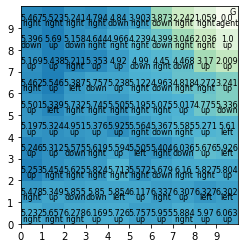

s:(1, 3)　a:up s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':left
----
s:(2, 4)　a:left s':(2, 4) a':left
----
s:(2, 4)　a:left s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':up
----
s:(1, 2)　a:up s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':down
----
s:(1, 2)　a:down s':(1, 1) a':right
----
s:(1, 1)　a:right s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':left
---

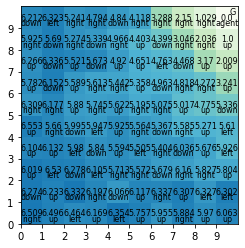

s:(4, 9)　a:left s':(4, 9) a':right
----
s:(4, 9)　a:right s':(5, 9) a':down
----
s:(5, 9)　a:down s':(5, 8) a':right
----
s:(5, 8)　a:right s':(6, 8) a':up
----
s:(6, 8)　a:up s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


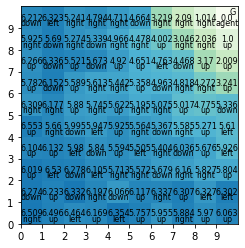

s:(6, 1)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 3) a':left
----
s:(6, 3)　a:left s':(5, 3) a':down
----
s:(5, 3)　a:down s':(5, 2) a':left
----
s:(5, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 3) a':right
----
s:(4, 3)　a:right s':(5, 3) a':right
----
s:(5, 3)　a:right s':(6, 3) a':down
----
s:(6, 3)　a:down s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':left
----
s:(5, 4)　a:left s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':right
----
s:(3, 4)　a:right s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':down
----
s:(4, 4)　a:down s':(4, 3) a':left
----
s:(4, 3)　a:left s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 3) a':right
----
s:(2, 3

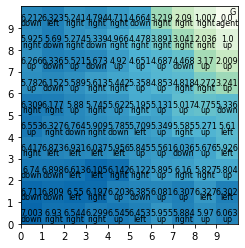

s:(6, 2)　a:left s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':right
----
s:(6, 0)　a:right s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 1) a':left
----
s:(7, 1)　a:left s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':right
----
s:(3, 3)　a:right s':(4, 3) a':down
----
s:(4, 3)　a:down s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 3) a':right
----
s:(4, 3)　a:right s':(5, 3) a':left
----
s:(5, 3)　a

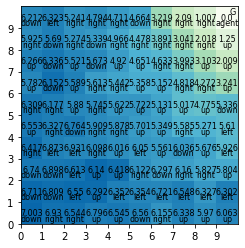

s:(8, 6)　a:up s':(8, 7) a':right
----
s:(8, 7)　a:right s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


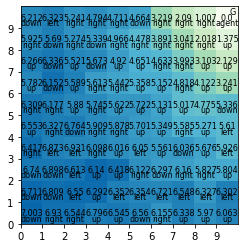

s:(2, 4)　a:up s':(2, 5) a':right
----
s:(2, 5)　a:right s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 7) a':left
----
s:(3, 7)　a:left s':(2, 7) a':down
----
s:(2, 7)　a:down s':(2, 6) a':right
----
s:(2, 6)　a:right s':(3, 6) a':left
----
s:(3, 6)　a:left s':(2, 6) a':left
----
s:(2, 6)　a:left s':(1, 6) a':left
----
s:(1, 6)　a:left s':(0, 6) a':right
----
s:(0, 6)　a:right s':(1, 6) a':up
----
s:(1, 6)　a:up s':(1, 7) a':up
----
s:(1, 7)　a:up s':(1, 8) a':right
----
s:(1, 8)　a:right s':(2, 8) a':left
----
s:(2, 8)　a:left s':(1, 8) a':left
----
s:(1, 8)　a:left s':(0, 8) a':down
----
s:(0, 8)　a:down s':(0, 7) a':right
----
s:(0, 7)　a:right s':(1, 7) a':left
----
s:(1, 7)　a:left s':(0, 7) a':down
----
s:(0, 7)　a:down s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':up
----
s:(0, 6)　a:up s':(0, 7) a':right
----
s:(0,

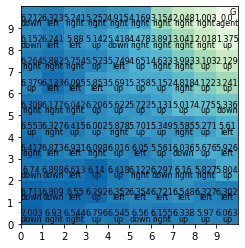

s:(8, 9)　a:right s':(9, 9) a':up
----


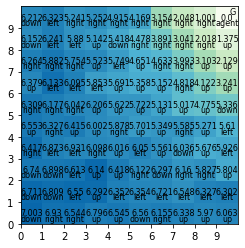

s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 3) a':right
----
s:(6, 3)　a:right s':(7, 3) a':up
----
s:(7, 3)　a:up s':(7, 4) a':left
----
s:(7, 4)　a:left s':(7, 4) a':left
----
s:(7, 4)　a:left s':(6, 4) a':left
----
s:(6, 4)　a:left s':(5, 4) a':down
----
s:(5, 4)　a:down s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':right
----
s:(5, 4)　a:right s':(6, 4) a':right
----
s:(6, 4)　a:right s':(7, 4) a':down
----
s:(7, 4)　a:down s':(7, 3) a':right
----
s:(7, 3)　a:right s':(8, 3) a':left
----
s:(8, 3)　a:left s':(7, 3) a':left
----
s:(7, 3)　a:left s':(7, 3) a':left
----
s:(7, 3)　a:left s':(6, 3) a':left
----
s:(6, 3)　a:left s':(5, 3) a':right
----
s:(5, 3)　a:right s':(6, 3) a':up
----
s:(6, 3)　a:up s':(6, 4) a':up
----
s:(6, 4)　a:up s':(6, 4) a':up
----
s:(6, 4)　a:up s':(6, 5) a':left
----
s:(6, 5)　a:left s':(5, 5) a':down
----
s:(5, 5)　a:d

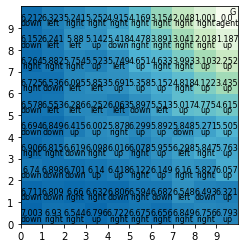

s:(3, 0)　a:right s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':right
----
s:(1, 2)　a:right s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 3) a':left
----
s:(2, 3)　a:left s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 2) a':right
----
s:(2, 2)　a:right s':(2, 2) a':right
----
s:(2, 2)　a:right s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':down
----
s:(5, 3)　a:down s':(5, 2) a':right
----
s:(5, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(7, 2) a':left
----
s:(7, 2)　a:left s':(6, 2

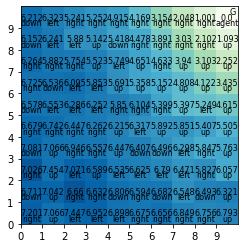

s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':right
----
s:(1, 1)　a:right s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':left
----
s:(1, 1)　a:left s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':right
----
s:(1, 1)　a:right s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':left
----
s:(2, 4)　a:left s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':right
----
s:(1, 5)　a:right s':(2, 5) a':up
----
s:(2, 5)　a:up s':(2, 6) a':up
----
s:(2, 6)　a:up s':(2, 7) a':up
----
s:(2, 7)　a:up s':(2, 8) a':down
----
s:(2, 8)　a:down s':(2, 7) a':left
----
s:(2, 7)　a:left s':(1, 7) a':right
----
s:(1, 7)　a:right s':(2, 7) a':down
----
s:(2, 7)　a

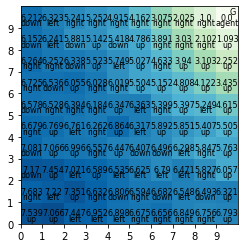

s:(4, 8)　a:right s':(5, 8) a':right
----
s:(5, 8)　a:right s':(6, 8) a':right
----
s:(6, 8)　a:right s':(6, 8) a':right
----
s:(6, 8)　a:right s':(7, 8) a':right
----
s:(7, 8)　a:right s':(8, 8) a':right
----
s:(8, 8)　a:right s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


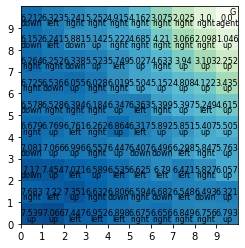

s:(3, 4)　a:left s':(2, 4) a':up
----
s:(2, 4)　a:up s':(2, 5) a':down
----
s:(2, 5)　a:down s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':right
----
s:(5, 4)　a:right s':(6, 4) a':down
----
s:(6, 4)　a:down s':(6, 3) a':right
----
s:(6, 3)　a:right s':(6, 3) a':right
----
s:(6, 3)　a:right s':(7, 3) a':up
----
s:(7, 3)　a:up s':(7, 4) a':down
----
s:(7, 4)　a:down s':(7, 3) a':right
----
s:(7, 3)　a:right s':(7, 3) a':right
----
s:(7, 3)　a:right s':(8, 3) a':up
----
s:(8, 3)　a:up s':(8, 4) a':right
----
s:(8, 4)　a:right s':(9, 4) a':down
----
s:(9, 4)　a:down s':(9, 3) a':right
----
s:(9, 3)　a:right s':(9, 3) a':right
----
s:(9, 3)　a:right s':(9, 3) a':down
----
s:(9, 3)　a:down s':(9, 2) a':down
----
s:(9, 2)　a:down s':(9, 

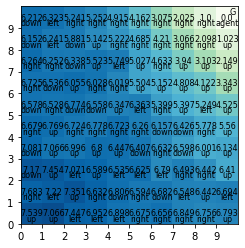

s:(3, 6)　a:left s':(2, 6) a':right
----
s:(2, 6)　a:right s':(3, 6) a':down
----
s:(3, 6)　a:down s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':left
----
s:(4, 5)　a:left s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':left
----
s:(3, 8)　a:left s':(2, 8) a':up
----
s:(2, 8)　a:up s':(2, 9) a':right
----
s:(2, 9)　a:right s':(3, 9) a':down
----
s:(3, 9)　a:down s':(3, 8) a':up
----
s:(3, 8)　a:up s':(3, 9) a':left
----
s:(3, 9)　a:left s':(2, 9) a':left
----
s:(2, 9)　a:left s':(1, 9) a':down
----
s:(1, 9)　a:down s':(1, 8) a':down
----
s:(1, 8)　a:down s':(1, 7) a':up
----
s:(1, 7)　a:up s':(1, 8) a':up
----
s:(1, 8)　a:up s':(1, 9) a':right
----
s:(1, 9)　a:right s':(2, 9) a':down
----
s:(2, 9)　a:down s':(2, 8) a':right
----
s:(2, 8)　a:right s':(3, 8) a':left
----
s:(3, 8)　a:left s':(2, 8) a':up
----
s:(2, 8)　a:up s':(2, 9) a':right
----
s:(2, 9)　a:right s':(3, 9) a':right
----
s:(3, 9)　

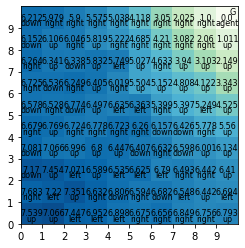

s:(0, 0)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':right
----
s:(2, 0)　a:right s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':down
----
s:(1, 2)　a:down s':(1, 1) a':left
----
s:(1, 1)　a:left s':(0, 1) a':up
----
s:

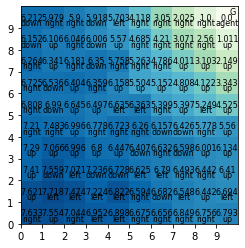

s:(2, 8)　a:left s':(1, 8) a':right
----
s:(1, 8)　a:right s':(2, 8) a':down
----
s:(2, 8)　a:down s':(2, 7) a':up
----
s:(2, 7)　a:up s':(2, 7) a':up
----
s:(2, 7)　a:up s':(2, 8) a':down
----
s:(2, 8)　a:down s':(2, 7) a':right
----
s:(2, 7)　a:right s':(3, 7) a':left
----
s:(3, 7)　a:left s':(2, 7) a':left
----
s:(2, 7)　a:left s':(1, 7) a':left
----
s:(1, 7)　a:left s':(0, 7) a':left
----
s:(0, 7)　a:left s':(0, 7) a':left
----
s:(0, 7)　a:left s':(0, 7) a':down
----
s:(0, 7)　a:down s':(0, 6) a':down
----
s:(0, 6)　a:down s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':up
----
s:(0, 6)　a:up s':(0, 7) a':right
----
s:(0, 7)　a:right s':(1, 7) a':right
----
s:(1, 7)　a:right s':(2, 7) a':down
----
s:

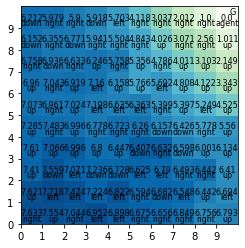

s:(6, 2)　a:down s':(6, 1) a':right
----
s:(6, 1)　a:right s':(7, 1) a':right
----
s:(7, 1)　a:right s':(8, 1) a':right
----
s:(8, 1)　a:right s':(9, 1) a':up
----
s:(9, 1)　a:up s':(9, 2) a':right
----
s:(9, 2)　a:right s':(9, 2) a':right
----
s:(9, 2)　a:right s':(9, 2) a':right
----
s:(9, 2)　a:right s':(9, 2) a':left
----
s:(9, 2)　a:left s':(8, 2) a':down
----
s:(8, 2)　a:down s':(8, 1) a':left
----
s:(8, 1)　a:left s':(7, 1) a':up
----
s:(7, 1)　a:up s':(7, 2) a':down
----
s:(7, 2)　a:down s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 1) a':left
----
s:(7, 1)　a:left s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':right
----
s:(6, 2)　a:right s':(7, 2) a':up
----
s:(7, 2)　a:up s':(7, 3) a':left
----
s:(7, 3)　a:left s':(6, 3) a':up
----
s:(6, 3)　a:up s':(6, 4) a':right
----
s:(6, 4)　a:right s':(7, 4) a':up
----
s:(7, 4)　a:up s':(7, 5) a':left
----
s:(7, 5)　a:left s':(6, 5) a':down
----
s:(6, 5)　a:down s':(6, 4) a':left
----
s:(6, 4)　a:left s':(5, 4) a':down
---

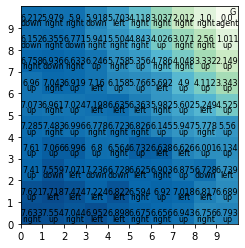

s:(3, 9)　a:right s':(4, 9) a':right
----
s:(4, 9)　a:right s':(5, 9) a':right
----
s:(5, 9)　a:right s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


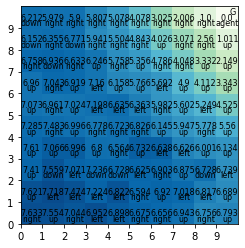

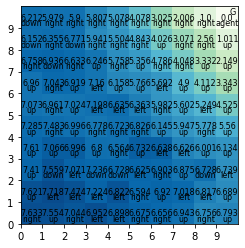

s:(8, 8)　a:up s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


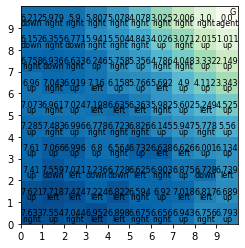

s:(2, 5)　a:left s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':right
----
s:(1, 5)　a:right s':(2, 5) a':up
----
s:(2, 5)　a:up s':(2, 6) a':down
----
s:(2, 6)　a:down s':(2, 6) a':down
----
s:(2, 6)　a:down s':(2, 5) a':down
----
s:(2, 5)　a:down s':(2, 4) a':left
----
s:(2, 4)　a:left s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':right
----
s:(1, 2)　a:right s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':up
-

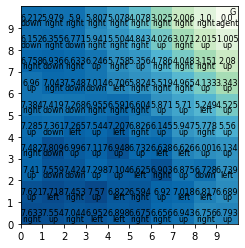

s:(8, 9)　a:right s':(9, 9) a':up
----


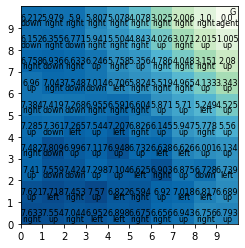

s:(4, 6)　a:right s':(5, 6) a':left
----
s:(5, 6)　a:left s':(4, 6) a':up
----
s:(4, 6)　a:up s':(4, 6) a':right
----
s:(4, 6)　a:right s':(5, 6) a':up
----
s:(5, 6)　a:up s':(5, 7) a':left
----
s:(5, 7)　a:left s':(4, 7) a':up
----
s:(4, 7)　a:up s':(4, 8) a':down
----
s:(4, 8)　a:down s':(4, 7) a':left
----
s:(4, 7)　a:left s':(3, 7) a':right
----
s:(3, 7)　a:right s':(4, 7) a':right
----
s:(4, 7)　a:right s':(5, 7) a':right
----
s:(5, 7)　a:right s':(6, 7) a':down
----
s:(6, 7)　a:down s':(6, 6) a':up
----
s:(6, 6)　a:up s':(6, 6) a':up
----
s:(6, 6)　a:up s':(6, 7) a':up
----
s:(6, 7)　a:up s':(6, 8) a':left
----
s:(6, 8)　a:left s':(5, 8) a':up
----
s:(5, 8)　a:up s':(5, 9) a':right
----
s:(5, 9)　a:right s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


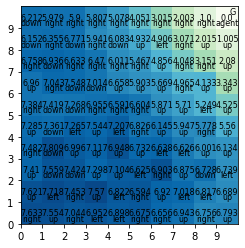

s:(2, 6)　a:up s':(2, 7) a':down
----
s:(2, 7)　a:down s':(2, 6) a':left
----
s:(2, 6)　a:left s':(1, 6) a':right
----
s:(1, 6)　a:right s':(2, 6) a':left
----
s:(2, 6)　a:left s':(1, 6) a':left
----
s:(1, 6)　a:left s':(0, 6) a':down
----
s:(0, 6)　a:down s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 6) a':right
----
s:(0, 6)　a:right s':(1, 6) a':up
----
s:(1, 6)　a:up s':(1, 7) a':down
----
s:(1, 7)　a:down s':(1, 6) a':down
----
s:(1, 6)　a:down s':(1, 6) a':down
----
s:(1, 6)　a:down s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 6) a':left
----
s:(1, 6)　a:left s':(0, 6) a':up
----
s:(0, 6)　a:up s':(0, 7) a':up
----
s:(0, 7)　a:up s':(0, 8) a':right
----
s:(0, 8)　a:right s':(1, 8) a':up
----
s:(1, 8)　a:up s':(1, 9) a':right
----
s:(1, 9)　a:right s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':down
----
s:(2, 9)　a:down s':(2, 9) a':down
----
s:(2, 9)　a:down s':(2, 8) a':right
----
s:(2, 8)　a:right s':(3, 8) a':up
----
s:(3, 8)　a:up s':(3, 9) a':left
----
s:(3, 9)　a:left s':(2, 9) a':left
----
s:(2, 9)　a

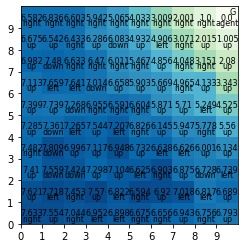

s:(9, 2)　a:up s':(9, 3) a':left
----
s:(9, 3)　a:left s':(8, 3) a':right
----
s:(8, 3)　a:right s':(8, 3) a':right
----
s:(8, 3)　a:right s':(9, 3) a':up
----
s:(9, 3)　a:up s':(9, 3) a':right
----
s:(9, 3)　a:right s':(9, 3) a':left
----
s:(9, 3)　a:left s':(8, 3) a':down
----
s:(8, 3)　a:down s':(8, 2) a':up
----
s:(8, 2)　a:up s':(8, 3) a':up
----
s:(8, 3)　a:up s':(8, 4) a':up
----
s:(8, 4)　a:up s':(8, 5) a':up
----
s:(8, 5)　a:up s':(8, 6) a':up
----
s:(8, 6)　a:up s':(8, 7) a':right
----
s:(8, 7)　a:right s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


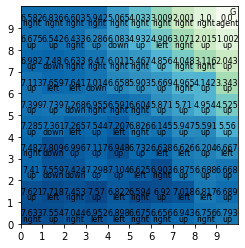

s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':right
----
s:(4, 2)　a:right s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':down
----
s:(5, 3)　a:down s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':le

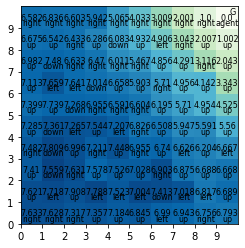

s:(4, 9)　a:right s':(4, 9) a':right
----
s:(4, 9)　a:right s':(4, 9) a':down
----
s:(4, 9)　a:down s':(4, 8) a':right
----
s:(4, 8)　a:right s':(4, 8) a':right
----
s:(4, 8)　a:right s':(5, 8) a':right
----
s:(5, 8)　a:right s':(6, 8) a':up
----
s:(6, 8)　a:up s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


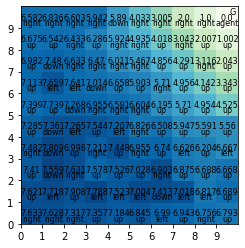

s:(8, 1)　a:up s':(8, 2) a':right
----
s:(8, 2)　a:right s':(9, 2) a':down
----
s:(9, 2)　a:down s':(9, 1) a':left
----
s:(9, 1)　a:left s':(9, 1) a':down
----
s:(9, 1)　a:down s':(9, 0) a':down
----
s:(9, 0)　a:down s':(9, 0) a':down
----
s:(9, 0)　a:down s':(9, 0) a':left
----
s:(9, 0)　a:left s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 1) a':down
----
s:(8, 1)　a:down s':(8, 0) a':left
----
s:(8, 0)　a:left s':(7, 0) a':down
----
s:(7, 0)　a:down s':(7, 0) a':down
----
s:(7, 0)　a:down s':(7, 0) a':left
----
s:(7, 0)　a:left s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':down
----
s:(6, 0)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(7, 0) a':right
----
s:(7, 0)　a:right s':(7, 0) a':left
----
s:(7, 0)　a:left s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':down
----
s:(7, 0)　a:down s':(7, 0) a':down
----
s:(7, 0)　a:down s':(7, 0) a':right
----
s:(7, 0)　a:right s':(8, 0) a':right
----
s:(8, 0)　a:right s':(9, 0) a':

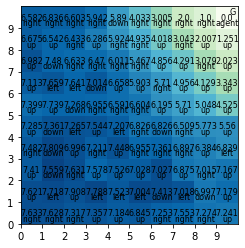

s:(1, 3)　a:up s':(1, 4) a':left
----
s:(1, 4)　a:left s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':down
----
s:(2, 4)　a:down s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 2) a':left
----
s:(2, 2)　a:left s':(1, 2) a':right
----
s:(1, 2)　a:right s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 3) a':left
----
s:(2, 3)　a:left s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':left
----
s:(0

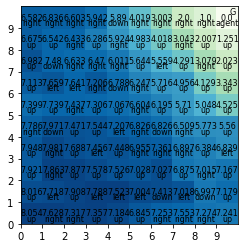

s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


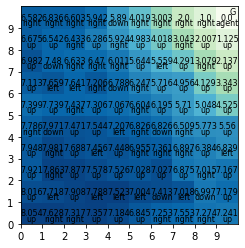

s:(0, 7)　a:right s':(1, 7) a':up
----
s:(1, 7)　a:up s':(1, 8) a':down
----
s:(1, 8)　a:down s':(1, 7) a':left
----
s:(1, 7)　a:left s':(0, 7) a':down
----
s:(0, 7)　a:down s':(0, 6) a':up
----
s:(0, 6)　a:up s':(0, 7) a':left
----
s:(0, 7)　a:left s':(0, 7) a':left
----
s:(0, 7)　a:left s':(0, 7) a':up
----
s:(0, 7)　a:up s':(0, 8) a':right
----
s:(0, 8)　a:right s':(1, 8) a':right
----
s:(1, 8)　a:right s':(2, 8) a':up
----
s:(2, 8)　a:up s':(2, 8) a':up
----
s:(2, 8)　a:up s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':up
----
s:(2, 9)　a:up s':(2, 9) a':left
----
s:(2, 9)　a:left s':(1, 9) a':down
----
s:(1, 9)　a:down s':(1, 8) a':up
----
s:(1, 8)　a:up s':(1, 9) a':left
----
s:(1, 9)　a:left s':(0, 9) a':down
----
s:(0, 9)　a:down s':(0, 8) a':up
----
s:(0, 8)　a:up s':(0, 9) a':left
----
s:(0, 9)　a:left s':(0, 9) a':left
----
s:(0, 9)　a:left s':(0, 9) a':up
----
s:(0, 9)　a:up s':(0, 9) a':up
----
s:(0, 9)　a:up s':(0, 9) a':right
----
s:(0, 9)　a:right s':(1, 9) a

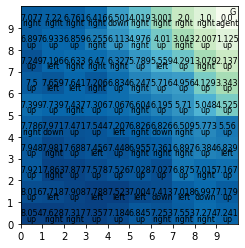

s:(8, 5)　a:down s':(8, 4) a':down
----
s:(8, 4)　a:down s':(8, 3) a':up
----
s:(8, 3)　a:up s':(8, 4) a':down
----
s:(8, 4)　a:down s':(8, 3) a':down
----
s:(8, 3)　a:down s':(8, 2) a':left
----
s:(8, 2)　a:left s':(7, 2) a':left
----
s:(7, 2)　a:left s':(6, 2) a':down
----
s:(6, 2)　a:down s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':right
--

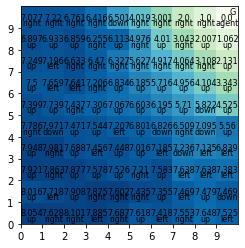

s:(3, 5)　a:right s':(4, 5) a':down
----
s:(4, 5)　a:down s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':left
----
s:(5, 4)　a:left s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 5) a':right
----
s:(4, 5)　a:right s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----
s:(5, 5)　a:up s':(5, 5) a':up
----
s:(5, 5)　a:up s':(5, 5) a':right
----
s:(5, 5)　a:right s':(6, 5) a':down
----
s:(6, 5)　a:down s':(6, 5) a':down
----
s:(6, 5)　a:down s':(6, 4) a':right
----
s:(6, 4)　a:right s':(7, 4) a':up
----
s:(7, 4)　a:up s':(7, 5) a':up
----
s:(7, 5)　a:up s':(7, 6) a':up
----
s:(7, 6)　a:up s':(7, 7) a':right
----
s:(7, 7)　a:right s':(8, 7) a':right
----
s:(8, 7)　a:right s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':down
----
s:(9, 8)　a:down s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


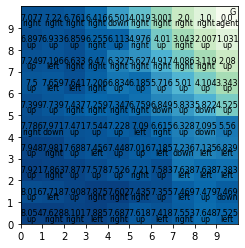

s:(3, 5)　a:down s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':right
----
s:(5, 3)　a:right s':(6, 3) a':up
----
s:(6, 3)　a:up s':(6, 4) a':left
----
s:(6, 4)　a:left s':(5, 4) a':down
----
s:(5, 4)　a:down s':(5, 4) a':down
----
s:(5, 4)　a:down s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----
s:(5, 5)　a:up s':(5, 6) a':down
----
s:(5, 6)　a:down s':(5, 5) a':left
----
s:(5, 5)　a:left s':(4, 5) a':left
----
s:(4, 5)　a:left s':(3, 5) a':left
----
s:(3, 5)　a:left s':(2, 5) a':left
----
s:(2, 5)　a:left s':(1, 5) a':left
----
s:(1, 

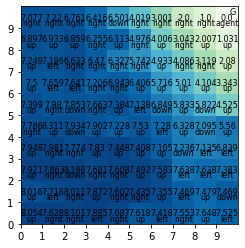

s:(2, 6)　a:right s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':down
----
s:(3, 8)　a:down s':(3, 8) a':down
----
s:(3, 8)　a:down s':(3, 7) a':left
----
s:(3, 7)　a:left s':(2, 7) a':right
----
s:(2, 7)　a:right s':(3, 7) a':right
----
s:(3, 7)　a:right s':(4, 7) a':up
----
s:(4, 7)　a:up s':(4, 8) a':left
----
s:(4, 8)　a:left s':(3, 8) a':right
----
s:(3, 8)　a:right s':(4, 8) a':right
----
s:(4, 8)　a:right s':(5, 8) a':right
----
s:(5, 8)　a:right s':(6, 8) a':up
----
s:(6, 8)　a:up s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':left
----
s:(8, 9)　a:left s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


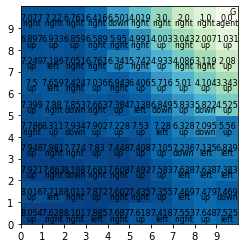

s:(1, 3)　a:up s':(1, 4) a':left
----
s:(1, 4)　a:left s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 6) a':right
----
s:(0, 6)　a:right s':(1, 6) a':up
----
s:(1, 6)　a:up s':(1, 7) a':right
----
s:(1, 7)　a:right s':(2, 7) a':left
----
s:(2, 7)　a:left s':(1, 7) a':up
----
s:(1, 7)　a:up s':(1, 8) a':left
----
s:(1, 8)　a:left s':(0, 8) a':down
----
s:(0, 8)　a:down s':(0, 7) a':right
----
s:(0, 7)　a:right s':(0, 7) a':right
----
s:(0, 7)　a:right s':(1, 7) a':left
----
s:(1, 7)　a:left s':(0, 7) a':up
----
s:(0, 7)　a:up s':(0, 8) a':up
----
s:(0, 8)　a:up s':(0, 9) a':left
----
s:(0, 9)　a:left s':(0, 9) a':left
----
s:(0, 9)　a:left s':(0, 9) a':down
----
s:(0, 9)　a:down s':(0, 9) a':down
----
s:(0, 9)　a:down s':(0, 8) a':right
----
s:(0, 8)　a:right s':(1, 8) a':right
----
s:(1, 8)　a:right s':(2, 8) a':left
----
s:(2

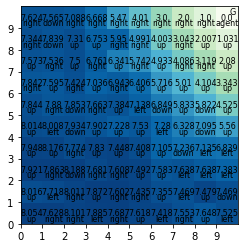

s:(0, 1)　a:right s':(1, 1) a':right
----
s:(1, 1)　a:right s':(1, 1) a':right
----
s:(1, 1)　a:right s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':right
----
s:(1, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----
s:(1, 2)　a:up s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':up
----
s:(2, 4)　a:up s':(2, 5) a':right
----
s:(2, 5)　a:right s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 6) a':down
----
s:(3, 6)　a:down s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':right
----
s:

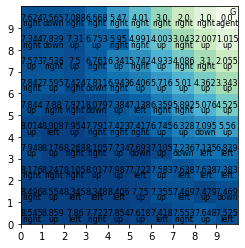

s:(9, 5)　a:up s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


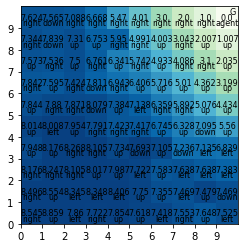

s:(4, 8)　a:right s':(5, 8) a':up
----
s:(5, 8)　a:up s':(5, 9) a':right
----
s:(5, 9)　a:right s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


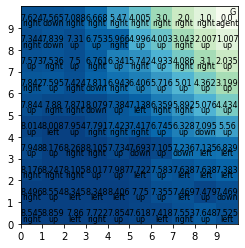

s:(0, 6)　a:left s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':up
----
s:(0, 6)　a:up s':(0, 6) a':up
----
s:(0, 6)　a:up s':(0, 7) a':down
----
s:(0, 7)　a:down s':(0, 6) a':down
----
s:(0, 6)　a:down s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 6) a':right
----
s:(0, 6)　a:right s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':left
----
s:(0, 6)　a:left s':(0, 6) a':down
----
s:(0, 6)　a:down s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 6) a':up
----
s:(1, 6)　a:up s':(1, 6) a':up
----
s:(1, 6)　a:up s':(1, 7) a':up
----
s:(1, 7)　a:up s':(1, 8) a':right
----
s:(1, 8)　a:right s':(2, 8) a':right
----
s:(2, 8)　a:right s':(3, 8) a':left
----
s:(3, 8)　a:left s':(2, 8) a':right
----
s:(2, 8)　a:right s':(3, 8) a':right
----
s:(3, 8)　a:right s':(4, 8) a':right
----
s:(4, 8)　a:right s':(5, 8) a':right
----
s:(5, 8)　a:right s':(5, 8) a':left
----
s:(5, 8)　a:left s':(4, 8) a':right
----
s:(4, 8)　a:right s':(5, 8) a':up
----
s:(5, 8)　a:up s':(5, 8) a':down
----


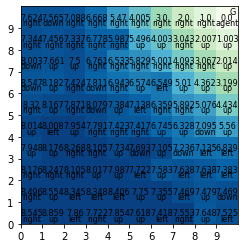

s:(2, 4)　a:right s':(3, 4) a':left
----
s:(3, 4)　a:left s':(2, 4) a':up
----
s:(2, 4)　a:up s':(2, 5) a':up
----
s:(2, 5)　a:up s':(2, 6) a':up
----
s:(2, 6)　a:up s':(2, 7) a':right
----
s:(2, 7)　a:right s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':up
----
s:(3, 8)　a:up s':(3, 9) a':down
----
s:(3, 9)　a:down s':(3, 8) a':right
----
s:(3, 8)　a:right s':(4, 8) a':right
----
s:(4, 8)　a:right s':(5, 8) a':right
----
s:(5, 8)　a:right s':(6, 8) a':up
----
s:(6, 8)　a:up s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


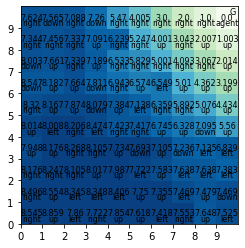

s:(7, 0)　a:left s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':left
----
s:(6, 1)　a:left s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':right
----
s:(6, 0)　a:right s':(7, 0) a':right
----
s:(7, 0)　a:right s':(8, 0) a':left
----
s:(8, 0)　a:left s':(7, 0) a':up
----
s:(7, 0)　a:up s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':right
----
s:(7, 0)　a:right s':(8, 0) a':down
----
s:(8, 0)　a:down s':(8, 0) a':down
----
s:(8, 0)　a:down s':(8, 0) a':right
----
s:(8, 0)　a:right s':(9, 0) a':up
----
s:(9, 0)　a:up s':(9, 1) a':left
----
s:(9, 1)　a:left s':(9, 1) a':left
----
s:(9, 1)　a:left s':(8, 1) a':down
----
s:(8, 1)　a:down s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 1) a':left
----
s:(8, 1)　a:left s':(7, 1) a':right
----
s:(7, 1)　a:right s':(8, 1) a':right
----
s:(8, 1)　a:right s':(9, 1) a':up
----
s:(9, 1)　a:up s':(9, 2) a':down
----
s:(9, 2)　a:down s':(9, 1) a':down
-

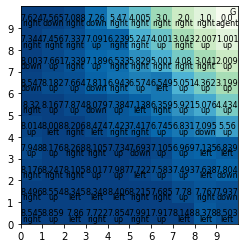

s:(6, 0)　a:left s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':right
----
s:(3, 2)　a:right s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':right
----
s:(5, 2)　a:right s':(5, 2) a':right
----
s:(5, 2)　a:right s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':up

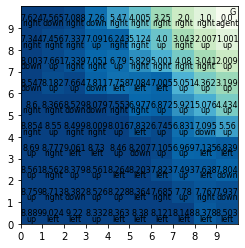

s:(2, 7)　a:left s':(1, 7) a':down
----
s:(1, 7)　a:down s':(1, 6) a':left
----
s:(1, 6)　a:left s':(1, 6) a':left
----
s:(1, 6)　a:left s':(1, 6) a':right
----
s:(1, 6)　a:right s':(2, 6) a':right
----
s:(2, 6)　a:right s':(3, 6) a':left
----
s:(3, 6)　a:left s':(2, 6) a':down
----
s:(2, 6)　a:down s':(2, 5) a':right
----
s:(2, 5)　a:right s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 6) a':right
----
s:(3, 6)　a:right s':(4, 6) a':down
----
s:(4, 6)　a:down s':(4, 6) a':down
----
s:(4, 6)　a:down s':(4, 5) a':up
----
s:(4, 5)　a:up s':(4, 6) a':up
----
s:(4, 6)　a:up s':(4, 7) a':left
----
s:(4, 7)　a:left s':(3, 7) a':down
----
s:(3, 7)　a:down s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 7) a':left
----
s:(3, 7)　a:left s':(2, 7) a':right
----
s:(2, 7)　a:right s':(3, 7) a':right
----
s:(3, 7)　a:right s':(4, 7) a':right
----
s:(4, 7)　a:right s':(4, 7) a':right
----
s:(4, 7)　a:right s':(5, 7) a':up
----
s:(5, 7)　a:up s':(5, 8) a':right
----
s:(5, 8)　a:right s':(6, 8) a':up
----
s:(6, 8)　a:up s':(6, 9) a':ri

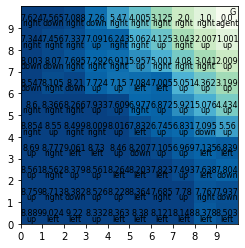

s:(6, 0)　a:right s':(7, 0) a':right
----
s:(7, 0)　a:right s':(8, 0) a':down
----
s:(8, 0)　a:down s':(8, 0) a':down
----
s:(8, 0)　a:down s':(8, 0) a':up
----
s:(8, 0)　a:up s':(8, 1) a':up
----
s:(8, 1)　a:up s':(8, 2) a':up
----
s:(8, 2)　a:up s':(8, 2) a':up
----
s:(8, 2)　a:up s':(8, 3) a':right
----
s:(8, 3)　a:right s':(9, 3) a':down
----
s:(9, 3)　a:down s':(9, 2) a':up
----
s:(9, 2)　a:up s':(9, 3) a':up
----
s:(9, 3)　a:up s':(9, 3) a':up
----
s:(9, 3)　a:up s':(9, 4) a':up
----
s:(9, 4)　a:up s':(9, 5) a':up
----
s:(9, 5)　a:up s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


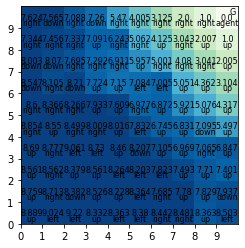

s:(2, 1)　a:right s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':right
----
s:(5, 1)　a:right s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':right
----
s:(6, 2)　a:right s':(7, 2) a':right
----
s:(7, 2)　a:right s':(8, 2) a':right
----
s:(8, 2)　a:right s':(9, 2) a':right
----
s:(9, 2)　a:right s':(9, 2) a':right
----
s:(9, 2)　a:right s':(9, 2) a':left
----
s:(9, 2)　a:left s':(8, 2) a':down
----
s:(8, 2)　a:down s':(8, 1) a':up
----
s:(8, 1)　a:up s':(8, 2) a':left
----
s:(8, 2)　a:left s':(7, 2) a':down
----
s:(7, 2)　a:down s':(7, 1) a':left
----
s:(7, 1)　a:left s':(6, 1) a':right
----
s:(6, 1)　a:right s':(7, 1) a':right
----
s:(7, 1)　a:right s':(8, 1) a':left
----
s:(8, 1)　a:left s':(7, 1) a':up
----
s:(7, 1)　a:up s':(7, 2) a':up
----
s:(7, 2)　a:up s':(7, 2) a':up
----
s:(7, 2)　a:up s':(7, 3) a':left
----
s:(7, 3)　a:left s':(6, 3) a':dow

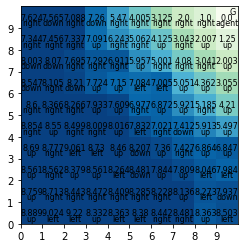

s:(8, 2)　a:up s':(8, 3) a':up
----
s:(8, 3)　a:up s':(8, 3) a':up
----
s:(8, 3)　a:up s':(8, 4) a':right
----
s:(8, 4)　a:right s':(9, 4) a':up
----
s:(9, 4)　a:up s':(9, 5) a':up
----
s:(9, 5)　a:up s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


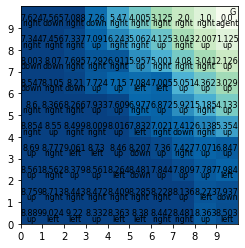

s:(6, 2)　a:down s':(6, 1) a':down
----
s:(6, 1)　a:down s':(6, 0) a':left
----
s:(6, 0)　a:left s':(5, 0) a':right
----
s:(5, 0)　a:right s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':left
----
s:(6, 1)　a:left s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':right
----
s:(5, 2)　a:right s':(6, 2) a':left
----
s:(6, 2)　a:left s':(6, 2) a':left
----
s:(6, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 3) a':right
----
s:(4, 3)　a:right s':(5, 3) a':left
----
s:(5, 3)　a:left s':(4, 3) a':right
----
s:(4, 3)　a:right s':(5, 3) a':right
----
s:(5, 3)　a:right s':(5, 3) a':right
----
s:(5, 3)　a:right s':(6, 3) a':left
----
s:(6, 3)　a:left s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':left
----
s:(5, 4)　a:left s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':left

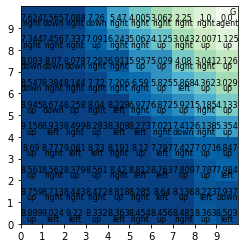

s:(3, 0)　a:up s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':up
----
s:(1, 2)　a:up s':(1, 3) a':up
----
s:(1, 

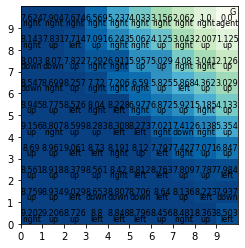

s:(2, 2)　a:left s':(1, 2) a':right
----
s:(1, 2)　a:right s':(2, 2) a':right
----
s:(2, 2)　a:right s':(2, 2) a':right
----
s:(2, 2)　a:right s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':

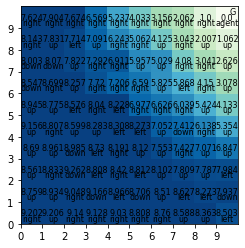

s:(1, 1)　a:right s':(1, 1) a':right
----
s:(1, 1)　a:right s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':right
----
s:(2, 2)　a:right s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':right
----
s:(5, 3)　a:right s':(6, 3) a':right
----
s:(6, 3)　a:right s':(7, 3) a':up
----
s:(7, 3)　a:up s':(7, 4) a':right
----
s:(7, 4)　a:right s':(8, 4) a':up
----
s:(8, 4)　a:up s':(8, 5) a':right
----
s:(8, 5)　a:right s':(9, 5) a':up
----
s:(9, 5)　a:up s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


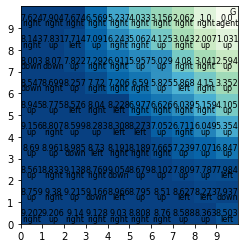

s:(8, 2)　a:up s':(8, 2) a':up
----
s:(8, 2)　a:up s':(8, 3) a':right
----
s:(8, 3)　a:right s':(9, 3) a':left
----
s:(9, 3)　a:left s':(8, 3) a':up
----
s:(8, 3)　a:up s':(8, 4) a':up
----
s:(8, 4)　a:up s':(8, 5) a':right
----
s:(8, 5)　a:right s':(9, 5) a':up
----
s:(9, 5)　a:up s':(9, 6) a':left
----
s:(9, 6)　a:left s':(8, 6) a':right
----
s:(8, 6)　a:right s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


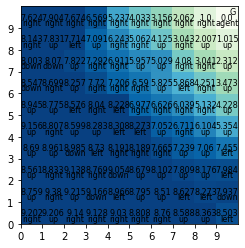

s:(9, 2)　a:up s':(9, 2) a':up
----
s:(9, 2)　a:up s':(9, 3) a':up
----
s:(9, 3)　a:up s':(9, 4) a':up
----
s:(9, 4)　a:up s':(9, 5) a':up
----
s:(9, 5)　a:up s':(9, 6) a':right
----
s:(9, 6)　a:right s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


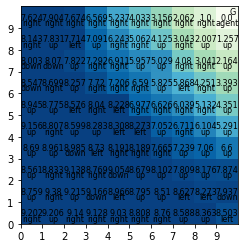

s:(1, 2)　a:left s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':left
----
s:(1, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':right
----
s:(0, 2)　a:right s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':right
----
s:(1, 2)　a:right s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':right
----
s:(5, 4)　a:right s':(6, 4) a':

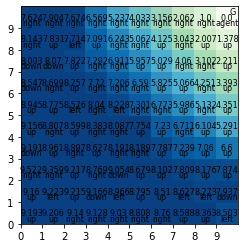

s:(5, 7)　a:down s':(5, 7) a':right
----
s:(5, 7)　a:right s':(5, 7) a':right
----
s:(5, 7)　a:right s':(6, 7) a':right
----
s:(6, 7)　a:right s':(7, 7) a':right
----
s:(7, 7)　a:right s':(8, 7) a':right
----
s:(8, 7)　a:right s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


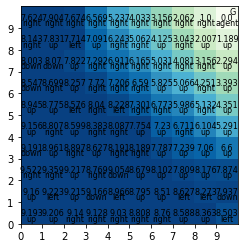

s:(5, 5)　a:left s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':down
----
s:(5, 5)　a:down s':(5, 4) a':down
----
s:(5, 4)　a:down s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':right
----
s:(5, 4)　a:right s':(6, 4) a':up
----
s:(6, 4)　a:up s':(6, 5) a':right
----
s:(6, 5)　a:right s':(7, 5) a':left
----
s:(7, 5)　a:left s':(6, 5) a':down
----
s:(6, 5)　a:down s':(6, 4) a':left
----
s:(6, 4)　a:left s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 4) a':left
----
s:(5, 4)　a:left s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 5) a':left
----
s:(4, 5)　a:left s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 6) a':right
----
s:(3, 6)　a:right s':(4, 6) a':up
----
s:(4, 6)　a:up s':(4, 7) a':down
----
s:(4, 7)　a:down s':(4, 6) a':right
----
s:(4, 6)　a:right s':(5, 6) a':left
----
s:(5, 6)　a:left s':(4, 6) a':right
----
s:(4, 6)　a:right s':(4, 6) a':left
----
s:(4, 6)　a:left s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':right
----
s:(3, 8)　a:right s':(4, 8) a':up
----
s:(4, 

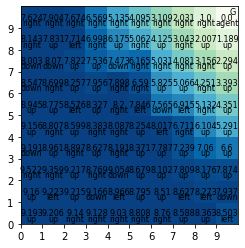

s:(1, 3)　a:down s':(1, 2) a':down
----
s:(1, 2)　a:down s':(1, 1) a':down
----
s:(1, 1)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----
s:(1, 1)　a:up s':(1, 2) a':down
----
s:(1, 2)　a:down s':(1, 1) a':left
----
s:(1, 1)　a:left s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':right
----
s:(1, 1)　a:right s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':left
-

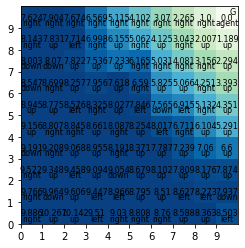

s:(5, 8)　a:right s':(6, 8) a':up
----
s:(6, 8)　a:up s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


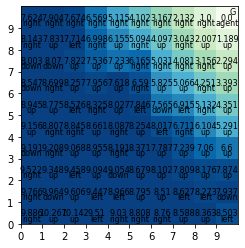

s:(2, 2)　a:right s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':right
----
s:(3, 3)　a:right s':(4, 3) a':right
----
s:(4, 3)　a:right s':(5, 3) a':left
----
s:(5, 3)　a:left s':(4, 3) a':down
----
s:(4, 3)　a:down s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 3) a':left
----
s:(4, 3)　a:left s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 2) a':down
----
s:(2, 2)　a:down s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':right
----
s:(4, 2)　a:right s':(4, 2) a':right
----
s:(4, 2)　a:right s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 3) a':up
----
s:(4, 3)　a:up s':(4, 4) a':right
-

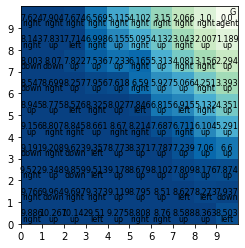

s:(5, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(6, 2) a':right
----
s:(6, 2)　a:right s':(7, 2) a':left
----
s:(7, 2)　a:left s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 3) a':right
----
s:(6, 3)　a:right s':(7, 3) a':down
----
s:(7, 3)　a:down s':(7, 2) a':up
----
s:(7, 2)　a:up s':(7, 3) a':up
----
s:(7, 3)　a:up s':(7, 4) a':left
----
s:(7, 4)　a:left s':(6, 4) a':up
----
s:(6, 4)　a:up s':(6, 5) a':up
----
s:(6, 5)　a:up s':(6, 5) a':up
----
s:(6, 5)　a:up s':(6, 6) a':right
----
s:(6, 6)　a:right s':(7, 6) a':right
----
s:(7, 6)　a:right s':(8, 6) a':right
----
s:(8, 6)　a:right s':(9, 6) a':up
----
s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


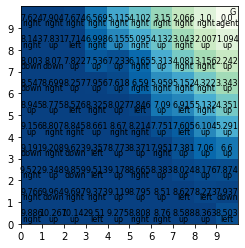

s:(4, 3)　a:up s':(4, 4) a':down
----
s:(4, 4)　a:down s':(4, 3) a':right
----
s:(4, 3)　a:right s':(4, 3) a':right
----
s:(4, 3)　a:right s':(4, 3) a':down
----
s:(4, 3)　a:down s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':right
----
s:(4, 1)　a:right s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':right
----
s:(3, 3)　a:right s':(4, 3) a':up
----
s:(4, 3)　a:up s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 5) a':down
----
s:(4, 5)　a:down s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':right
----
s:(5, 4)　a:right s':(6, 4) a':down
----
s:(6, 4)　a:down s':(6, 3) a':down
----
s:(6, 3)　a:down s':(6, 2) a':

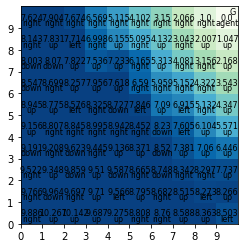

s:(7, 2)　a:down s':(7, 1) a':down
----
s:(7, 1)　a:down s':(7, 0) a':left
----
s:(7, 0)　a:left s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 0) a':up
----
s:(6, 0)　a:up s':(6, 1) a':up
----
s:(6, 1)　a:up s':(6, 2) a':up
----
s:(6, 2)　a:up s':(6, 3) a':up
----
s:(6, 3)　a:up s':(6, 4) a':up
----
s:(6, 4)　a:up s':(6, 5) a':right
----
s:(6, 5)　a:right s':(7, 5) a':up
----
s:(7, 5)　a:up s':(7, 6) a':up
----
s:(7, 6)　a:up s':(7, 6) a':up
----
s:(7, 6)　a:up s':(7, 7) a':right
----
s:(7, 7)　a:right s':(8, 7) a':right
----
s:(8, 7)　a:right s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


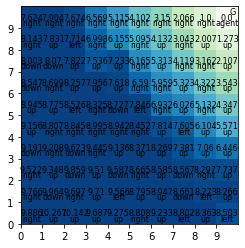

s:(1, 1)　a:left s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':right
----
s:(0, 4)　a:right s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 6) a':up
----
s:(1, 6)　a:up s':(1, 7) a':right
----
s:(1, 7)　a:right s':(2, 7) a':right
----
s:(2, 7)　a:right s':(3, 7) a':right
----
s:(3, 7)　a:right s':(4, 7) a':right
----
s:(4, 7)　a:right s':(5, 7) a':up
----
s:(5, 7)　a:up s':(5, 8) a':right
----
s:(5, 8)　a:right s':(6, 8) a':up
----
s:(6, 8)　a:up s':(6, 9

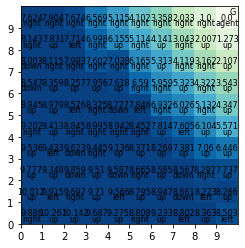

s:(4, 3)　a:left s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':left
----
s:(3, 4)　a:left s':(2, 4) a':down
----
s:(2, 4)　a:down s':(2, 3) a':left
----
s:(2, 3)　a:left s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':left
----
s:(2, 3)　a:left s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':down
----
s:(2, 4)　a:down s':(2, 4) a':left
----
s:(2, 4)　a:left s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':up
----
s:(2, 4)　a:up s':(2, 5) a':up
----
s:(2, 5)　a:up s':(2, 6) a':right
----
s:(2, 6)　a:right s':(3, 6) a':up
----
s:(3, 6)　a:up s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':down
----
s:(3, 8)　a:down s':(3, 7) a':up
----
s:(3, 7)　a:up s':(3, 8) a':right
----
s:(3, 8)　a:right s':(4, 8) a':up
----
s:(4, 8)　a:up s':(4, 9) a':right
----
s:(4, 9)　a:right s':(5, 9) a':right
----
s:(5, 9)　a:right s':(6, 9) a':right
----
s:(6, 9)　a:right s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7,

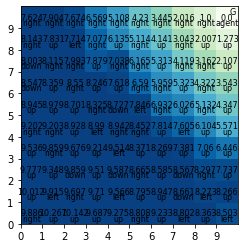

s:(9, 6)　a:up s':(9, 7) a':up
----
s:(9, 7)　a:up s':(9, 8) a':up
----
s:(9, 8)　a:up s':(9, 9) a':up
----


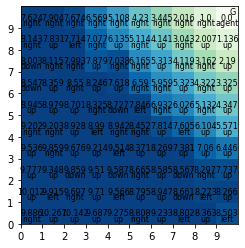

s:(3, 9)　a:right s':(4, 9) a':right
----
s:(4, 9)　a:right s':(4, 9) a':right
----
s:(4, 9)　a:right s':(5, 9) a':right
----
s:(5, 9)　a:right s':(6, 9) a':up
----
s:(6, 9)　a:up s':(6, 9) a':right
----
s:(6, 9)　a:right s':(7, 9) a':right
----
s:(7, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(8, 9) a':right
----
s:(8, 9)　a:right s':(9, 9) a':up
----


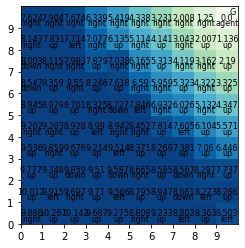

In [6]:
alpha = 0.5
gamma = 1.0

def Qfunction(s_pos,a):
    s = states[s_pos[0]][s_pos[1]]
    s_next_pos = state_transition(s_pos,a)
    s_next = states[s_next_pos[0]][s_next_pos[1]]
    a_next = e_greedy(s_next)
    
    q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[s_next.best_action])
    print("s:" + str(s_pos)+ "　a:" + a + " s':" + str(s_next_pos) + " a':" + a_next)
    print("----")
    return s_next_pos, a_next, q

def one_trial():
    agent.pos = (random.randrange(size),random.randrange(size))
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
          
    while True:
        #draw(None)
        s_next, a_next, q = Qfunction(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = q
        agent.pos = s_next
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            break
            
            
for i in range(100):
    one_trial()
    draw("all")